## Import Data ##

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import *
import matplotlib.pyplot as plt
import warnings
import os

warnings.filterwarnings("ignore", category=DeprecationWarning)

files = os.listdir()
data = [f for f in files if f.endswith(".csv")]

if data:
    df = pd.read_csv(data[0])
else:
    print("No data files found in the directory.")

df

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,'5-6 hours',Unhealthy,'Class 12',Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,'Less than 5 hours',Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,'5-6 hours',Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,'Less than 5 hours',Healthy,'Class 12',Yes,10.0,5.0,No,1


In [4]:
df = df.drop(columns="id")

In [6]:
from sklearn.preprocessing import LabelEncoder

#Words to numbers
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == "object":
        df[column] = le.fit_transform(df[column])

In [8]:
X = df.drop(columns=["Depression"])
y = df["Depression"]

In [16]:
df

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,1,33.0,51,12,5.0,0.0,8.97,2.0,0.0,0,0,4,1,3.0,0,0,1
1,0,24.0,5,12,2.0,0.0,5.90,5.0,0.0,0,1,11,0,3.0,1,1,0
2,1,31.0,44,12,3.0,0.0,7.03,5.0,0.0,2,0,6,0,9.0,0,1,0
3,0,28.0,49,12,3.0,0.0,5.59,2.0,0.0,1,1,8,1,4.0,4,1,1
4,0,25.0,18,12,4.0,0.0,8.13,3.0,0.0,0,1,17,1,1.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,0,27.0,45,12,5.0,0.0,5.75,5.0,0.0,0,3,0,1,7.0,0,1,0
27897,1,27.0,25,12,2.0,0.0,9.40,3.0,0.0,2,0,25,0,0.0,2,1,0
27898,1,31.0,11,12,3.0,0.0,6.61,4.0,0.0,0,3,22,0,12.0,1,0,0
27899,0,18.0,25,12,5.0,0.0,6.88,2.0,0.0,2,0,0,1,10.0,4,0,1


## Data Clean Up ##

In [18]:
stats.zscore(df) #Find outliers

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0.891416,1.463165,1.535530,0.02642,1.345543,-0.009777,0.893393,-0.693425,-0.01534,-1.421696,-1.182363,-0.594731,0.761745,-1.121213,-1.488765,-0.968421,0.841395
1,-1.121811,-0.371474,-1.434295,0.02642,-0.826104,-0.009777,-1.194076,1.510636,-0.01534,-1.421696,-0.375705,0.246705,-1.312775,-1.121213,-0.793137,1.032609,-1.188502
2,0.891416,1.055467,1.083600,0.02642,-0.102222,-0.009777,-0.425724,1.510636,-0.01534,0.459582,-1.182363,-0.354321,-1.312775,0.497095,-1.488765,1.032609,-1.188502
3,-1.121811,0.443921,1.406408,0.02642,-0.102222,-0.009777,-1.404862,-0.693425,-0.01534,-0.481057,-0.375705,-0.113911,0.761745,-0.851495,1.293747,1.032609,0.841395
4,-1.121811,-0.167625,-0.594997,0.02642,0.621660,-0.009777,0.322229,0.041262,-0.01534,-1.421696,-0.375705,0.967935,0.761745,-1.660650,-1.488765,-0.968421,-1.188502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,-1.121811,0.240073,1.148162,0.02642,1.345543,-0.009777,-1.296069,1.510636,-0.01534,-1.421696,1.237613,-1.075552,0.761745,-0.042341,-1.488765,1.032609,-1.188502
27897,0.891416,0.240073,-0.143067,0.02642,-0.826104,-0.009777,1.185774,0.041262,-0.01534,0.459582,-1.182363,1.929576,-1.312775,-1.930368,-0.097509,1.032609,-1.188502
27898,0.891416,1.055467,-1.046927,0.02642,-0.102222,-0.009777,-0.711306,0.775949,-0.01534,-1.421696,1.237613,1.568961,-1.312775,1.306249,-0.793137,-0.968421,-1.188502
27899,-1.121811,-1.594566,-0.143067,0.02642,1.345543,-0.009777,-0.527718,-0.693425,-0.01534,0.459582,-1.182363,-1.075552,0.761745,0.766813,1.293747,-0.968421,0.841395


In [20]:
#Drop outliers
z = np.abs(stats.zscore(df))
threshold_z = 3
outliers = np.where(z > threshold_z)[0]
df = df.drop(outliers)
df = df.reset_index(drop=True)
df.shape

(27840, 17)

In [66]:
df.isna().sum()

Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [ ]:
df = df.dropna() #drop rows with missing values
df = df.reset_index(drop=True)

In [24]:
df.duplicated().sum()

0

In [ ]:
df = df.drop_duplicates() #drop duplicate rows
df = df.reset_index(drop=True)

In [ ]:
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=[""])
y = df[""]

#Standardize data, helpful for linear regression and Neural Networks
object = StandardScaler()
df = pd.DataFrame(object.fit_transform(X))

In [26]:
X = df.drop(columns=["Depression"])
y = df["Depression"]
df

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,1,33.0,51,12,5.0,0.0,8.97,2.0,0.0,0,0,4,1,3.0,0,0,1
1,0,24.0,5,12,2.0,0.0,5.90,5.0,0.0,0,1,11,0,3.0,1,1,0
2,1,31.0,44,12,3.0,0.0,7.03,5.0,0.0,2,0,6,0,9.0,0,1,0
3,0,28.0,49,12,3.0,0.0,5.59,2.0,0.0,1,1,8,1,4.0,4,1,1
4,0,25.0,18,12,4.0,0.0,8.13,3.0,0.0,0,1,17,1,1.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27835,0,27.0,45,12,5.0,0.0,5.75,5.0,0.0,0,3,0,1,7.0,0,1,0
27836,1,27.0,25,12,2.0,0.0,9.40,3.0,0.0,2,0,25,0,0.0,2,1,0
27837,1,31.0,11,12,3.0,0.0,6.61,4.0,0.0,0,3,22,0,12.0,1,0,0
27838,0,18.0,25,12,5.0,0.0,6.88,2.0,0.0,2,0,0,1,10.0,4,0,1


## Statistical Modeling ##

In [28]:
df.describe()

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
count,27840.000000,27840.000000,27840.000000,27840.0,27840.000000,27840.0,27840.000000,27840.000000,27840.0,27840.00000,27840.000000,27840.000000,27840.000000,27840.000000,27840.000000,27840.000000,27840.000000
mean,0.557220,25.806250,27.222055,12.0,3.141272,0.0,7.658505,2.944289,0.0,1.51153,1.466092,8.940841,0.632759,7.158728,2.139368,0.483836,0.585381
std,0.496724,4.872648,15.490105,0.0,1.380947,0.0,1.464566,1.360470,0.0,1.06312,1.239750,8.315205,0.482062,3.706827,1.437607,0.499748,0.492665
min,0.000000,18.000000,0.000000,12.0,0.000000,0.0,5.030000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,21.000000,16.000000,12.0,2.000000,0.0,6.290000,2.000000,0.0,1.00000,0.000000,1.000000,0.000000,4.000000,1.000000,0.000000,0.000000
50%,1.000000,25.000000,24.000000,12.0,3.000000,0.0,7.770000,3.000000,0.0,2.00000,1.000000,7.000000,1.000000,8.000000,2.000000,0.000000,1.000000
75%,1.000000,30.000000,44.000000,12.0,4.000000,0.0,8.920000,4.000000,0.0,2.00000,3.000000,16.000000,1.000000,10.000000,3.000000,1.000000,1.000000
max,1.000000,39.000000,51.000000,12.0,5.000000,0.0,10.000000,5.000000,0.0,4.00000,3.000000,27.000000,1.000000,12.000000,5.000000,1.000000,1.000000


In [30]:
df.corr()

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
Gender,1.000000,0.009953,-0.023075,NaN,-0.022232,NaN,0.037089,-0.015508,NaN,0.012355,0.063202,0.009495,-0.001498,0.012947,-0.005383,-0.015881,0.001760
Age,0.009953,1.000000,0.047855,NaN,-0.076573,NaN,0.005393,0.009550,NaN,-0.008840,-0.062293,0.425795,-0.113148,-0.031889,-0.096945,-0.006184,-0.226313
City,-0.023075,0.047855,1.000000,NaN,-0.020793,NaN,-0.028153,0.006846,NaN,-0.010512,-0.011370,0.023856,-0.004492,-0.002930,-0.003087,0.004259,-0.024169
Profession,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Academic Pressure,-0.022232,-0.076573,-0.020793,NaN,1.000000,NaN,-0.025111,-0.111791,NaN,-0.006529,0.091644,-0.054357,0.262100,0.096226,0.151949,0.030036,0.475113
Work Pressure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CGPA,0.037089,0.005393,-0.028153,NaN,-0.025111,NaN,1.000000,-0.046955,NaN,-0.021054,0.001610,-0.009231,0.008164,0.002934,0.006590,-0.004257,0.022252
Study Satisfaction,-0.015508,0.009550,0.006846,NaN,-0.111791,NaN,-0.046955,1.000000,NaN,0.003611,-0.017253,-0.027399,-0.083723,-0.036454,-0.064903,-0.004045,-0.168285
Job Satisfaction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sleep Duration,0.012355,-0.008840,-0.010512,NaN,-0.006529,NaN,-0.021054,0.003611,NaN,1.000000,0.010994,-0.009238,-0.021316,-0.038670,-0.002579,0.000655,-0.022660


In [32]:
kstest(X, "norm").pvalue #p-value for each row
#kstest(df[""], "norm").pvalue #p-value for each column

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

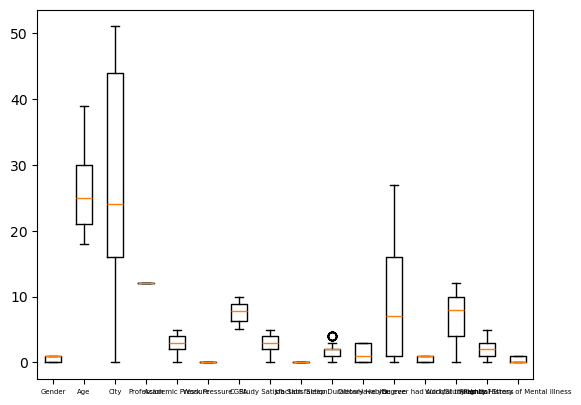

In [34]:
import matplotlib.pyplot as plt
import seaborn as sn

#When dealing with very large data-sets/working with others using graphs to see things would be beneficial to everyone's sanity
fig, ax = plt.subplots()
ax.boxplot(X)
ax.set_xticklabels(X.columns, size=5)
plt.show()

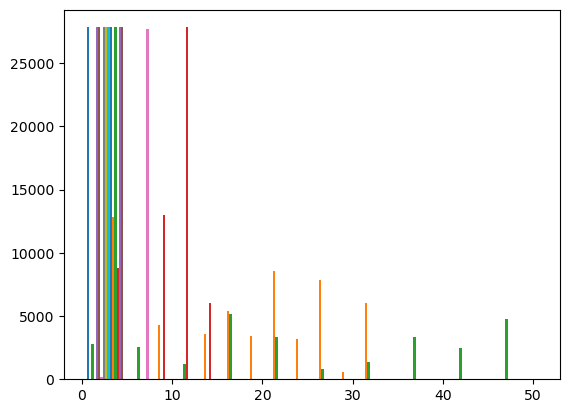

In [36]:
plt.hist(X)
plt.show()

## Fine-Tuning (In this case fine-tuning by hand with numerical analysis and optimization techniques would be faster) ##

Switch all classifiers to regressors when dealing with quantitative data (i.e. temperature, pay, etc.)

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score

#Define the function to optimize using cross-validation
def dtree_cv(max_depth, min_samples_split, min_samples_leaf):
    #Define the model with the parameters to be optimized
    estimator = RandomForestClassifier(
        max_depth=int(max_depth),
        min_samples_split=int(min_samples_split),
        min_samples_leaf=int(min_samples_leaf),
        random_state=42
    )
    cval = cross_val_score(estimator, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
    return cval.mean() #The optimizer tries to maximize the function, so we negate the score to minimize it

#Define the parameter bounds
param_bounds = {
    'max_depth': (1, 20),
    'min_samples_split': (2, 20),
    'min_samples_leaf': (1, 20)
}

optimizer = BayesianOptimization(
    f=dtree_cv,
    pbounds=param_bounds,
    random_state=42,
)

optimizer.maximize(n_iter=100, init_points=6) #Bayesian optimization
best_params_bayes = optimizer.max['params']
best_params_bayes['max_depth'] = int(best_params_bayes['max_depth'])
best_params_bayes['min_samples_split'] = int(best_params_bayes['min_samples_split'])
best_params_bayes['min_samples_leaf'] = int(best_params_bayes['min_samples_leaf'])
best_score_bayes = optimizer.max['target']

print(f"Best Parameters (Bayesian Optimization): {best_params_bayes}")
print(f"Best Score (Bayesian Optimization): {best_score_bayes}")

|   iter    |  target   | max_depth | min_sa... | min_sa... |
-------------------------------------------------------------
| 1         | -0.1596   | 8.116     | 19.06     | 15.18     |
| 2         | -0.1578   | 12.37     | 3.964     | 4.808     |
| 3         | -0.1876   | 2.104     | 17.46     | 12.82     |
| 4         | -0.1575   | 14.45     | 1.391     | 19.46     |
| 5         | -0.1579   | 16.82     | 5.034     | 5.273     |
| 6         | -0.1701   | 4.485     | 6.781     | 11.45     |
| 7         | -0.1583   | 14.11     | 7.006     | 3.003     |
| 8         | -0.159    | 13.95     | 19.95     | 16.55     |
| 9         | -0.1584   | 17.64     | 6.371     | 14.36     |
| 10        | -0.1586   | 13.86     | 11.66     | 19.64     |
| 11        | -0.1584   | 17.78     | 14.81     | 9.041     |
| 12        | -0.1584   | 20.0      | 18.85     | 2.07      |
| 13        | -0.1593   | 12.11     | 18.79     | 2.133     |
| 14        | -0.1592   | 19.79     | 1.081     | 10.5      |
| 15    

## Training Model ##

In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import joblib

model1 = RandomForestClassifier(max_depth = 16, min_samples_leaf = 1, min_samples_split = 15, n_estimators = 100, random_state=42).fit(X_train, y_train)

predictions = model1.predict(X_test)
score = accuracy_score(y_test, predictions)
print(f"Accuracy: {score}")

#Save Model
if score >= 0.8:
    joblib.dump(model1, "Triste.joblib")
    model = joblib.load("Triste.joblib")

Accuracy: 0.8459051724137931


In [134]:
from sklearn.tree import DecisionTreeClassifier
import joblib

model2 = DecisionTreeClassifier(max_depth = 18, min_samples_leaf = 1, min_samples_split = 2).fit(X_train, y_train)

predictions = model2.predict(X_test)
score = accuracy_score(y_test, predictions)
print(f"Accuracy: {score}")

#Save Model
if score >= 0.8:
    joblib.dump(model2, ".joblib")
    model = joblib.load(".joblib")

Accuracy: 0.7750239463601533


## Post-Training Analysis ##

In [96]:
y_predicted = model.predict(X_test)

In [98]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[2692,  774],
       [ 513, 4373]])

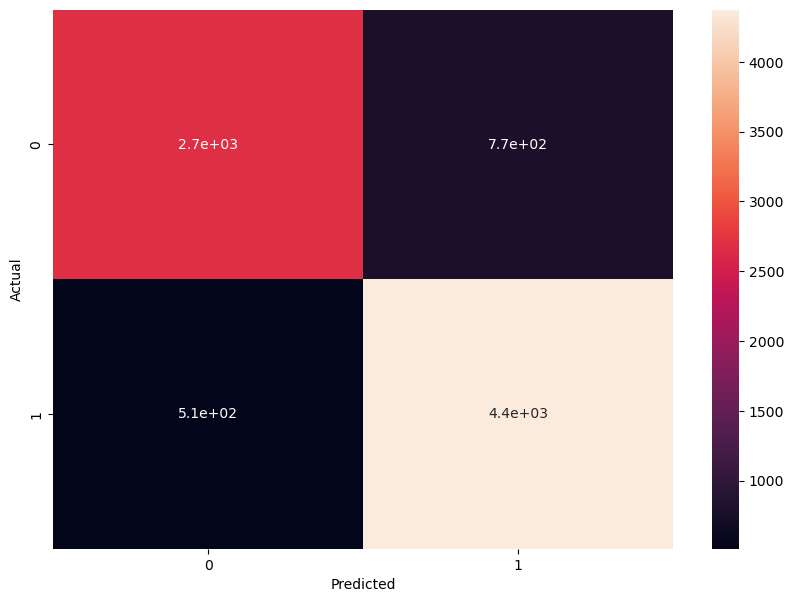

In [100]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn

plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [102]:
prob1 = model.predict_proba(X)[:, 1] #Probability of A doing y (1) in the future
prob1

array([0.55377287, 0.0419162 , 0.06209657, ..., 0.16776929, 0.98982379,
       0.83953195])

In [104]:
prob2 = model.predict_proba(X[:len(df)]) #Probability of A doing y (0 or 1) in the future
prob2

array([[0.44622713, 0.55377287],
       [0.9580838 , 0.0419162 ],
       [0.93790343, 0.06209657],
       ...,
       [0.83223071, 0.16776929],
       [0.01017621, 0.98982379],
       [0.16046805, 0.83953195]])

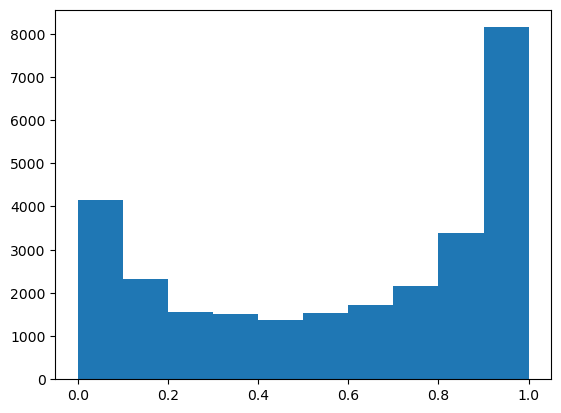

In [106]:
plt.hist(prob1)
plt.show()

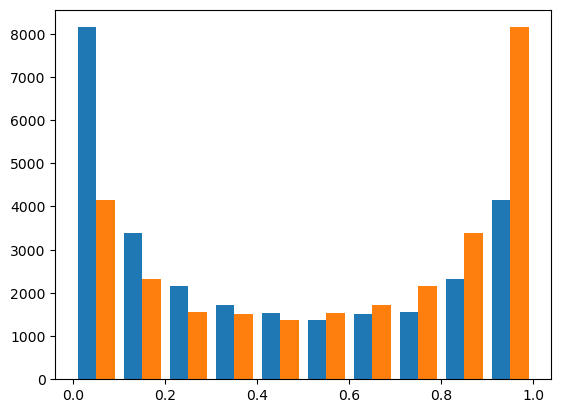

In [108]:
plt.hist(prob2)
plt.show()

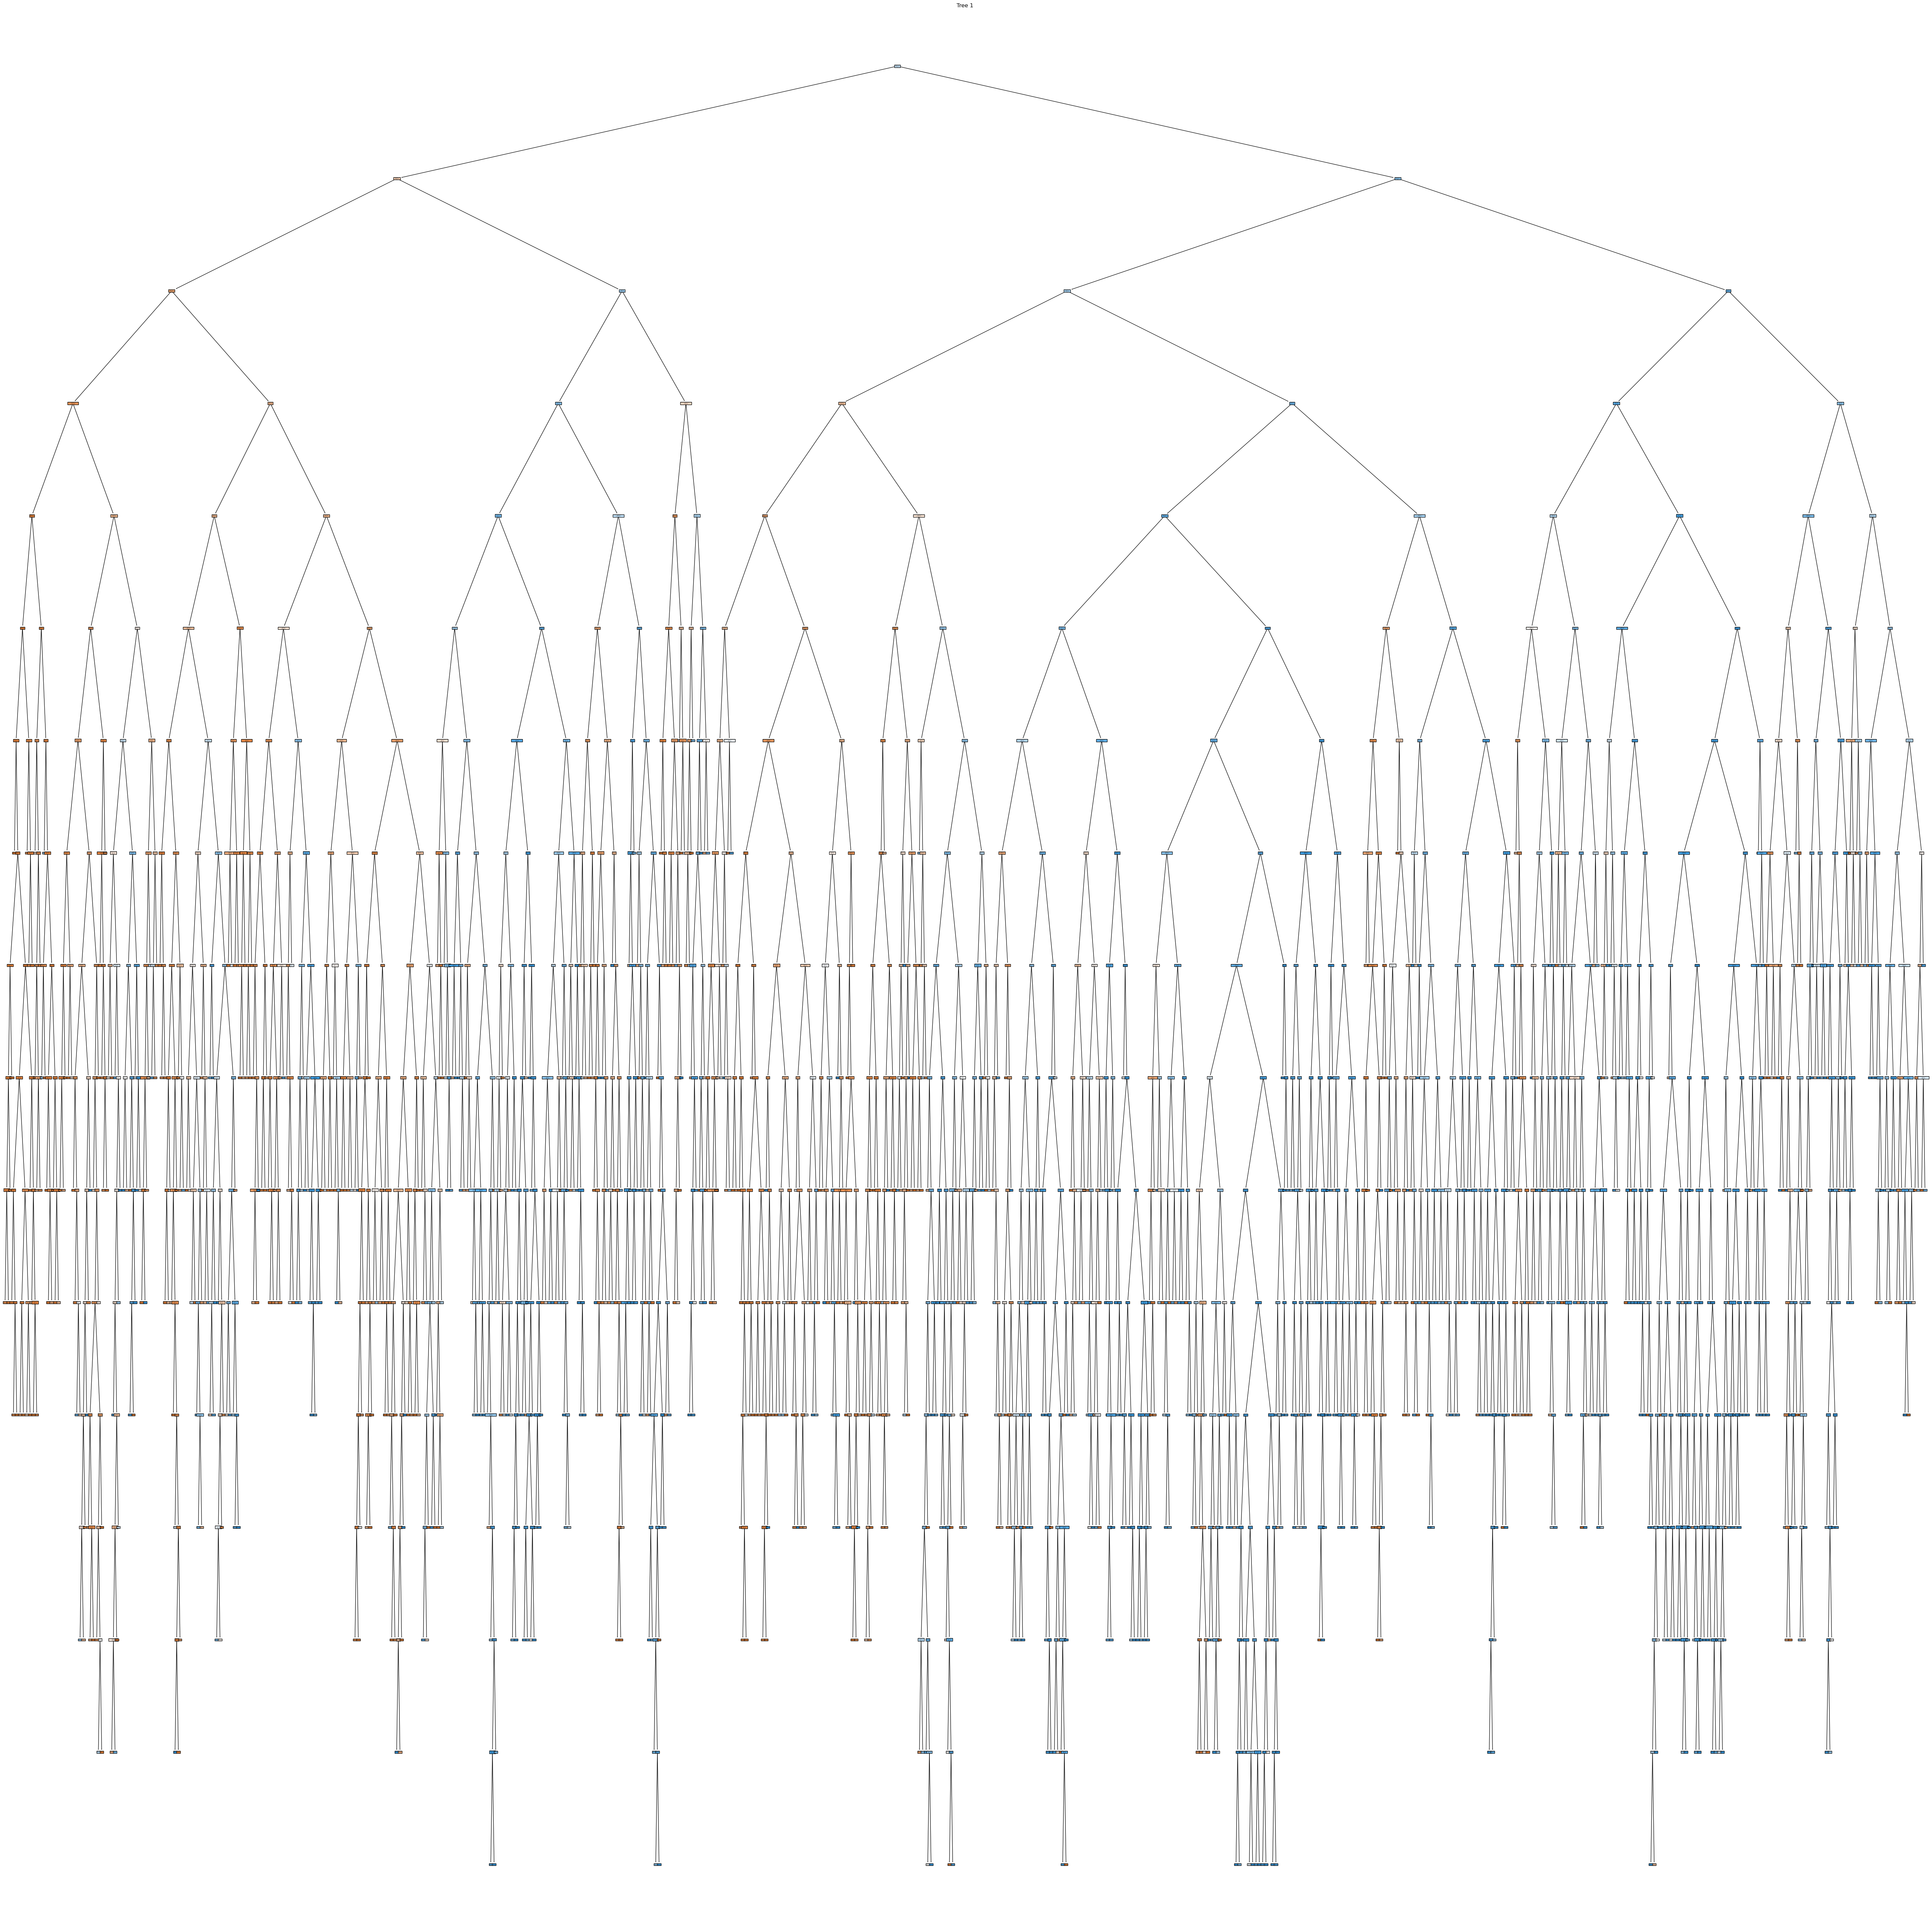

In [132]:
from sklearn.tree import plot_tree
#If the model is a random forest use this for visualization

for i in range(1):
    plt.figure(figsize=(75, 75))
    plot_tree(model.estimators_[i], feature_names=X.columns, 
              class_names=[str(label) for label in df["Depression"].unique()],
              filled=True)
    plt.title(f"Tree {i+1}")
    plt.show()